In [ ]:
import pandas as pd
import numpy as np
from numpy import array, linspace
from numpy.random import randint
from matplotlib.pyplot import hist, xticks, show, yticks, savefig
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from rdkit.Chem import rdFingerprintGenerator, AllChem
from models.copolymer_set_transformer import *
from models.monomer_representations import *

# ML

In [ ]:
electrochromics = pd.read_csv(
    'datasets/literature_only_dataset_with_abs.csv'
)
electrochromics = electrochromics[electrochromics.monomer_B != 'GM1']
electrochromics = electrochromics[electrochromics['monomer_A '] != 'A4']
electrochromics['smiles_A'] = electrochromics['smiles_A'].str.replace('*', 'C')
electrochromics['smiles_B'] = electrochromics['smiles_B'].str.replace('*', 'C')
electrochromics['smiles_C'] = electrochromics['smiles_C'].str.replace('*', 'C')

df = electrochromics  # .fillna(0)#['color'] ['a* (Colored State)]
df = df[
    [
        'smiles_A',
        'Percentage of A %',
        'smiles_B',
        'Percentage of B %',
        'smiles_C',
        'Percentage of C %',
        'L* (Colored State)',
        'a* (Colored State)',
        'b*(Colored State)',
    ]
]  # 'Bandgap (eV)',
df['Percentage of A %'] = df['Percentage of A %'] / 100
df['Percentage of B %'] = df['Percentage of B %'] / 100
df['Percentage of C %'] = df['Percentage of C %'] / 100
df = df.dropna(axis=0)
df

In [ ]:
dictionary, descriptor_names = get_dft_descriptors_dictionary(
    'datasets/dft_descriptors_ECPs.csv'
)

In [5]:
# Converting to the DFT and RDkit descriptors
df1_dft = dft_descr_from_df(df.smiles_A, 'A')
df2_dft = dft_descr_from_df(df.smiles_B, 'B')
df3_dft = dft_descr_from_df(df.smiles_C, 'C')

df1 = bits_to_df(df.smiles_A, 'bit_A')
df2 = bits_to_df(df.smiles_B, 'bit_B')
df3 = bits_to_df(df.smiles_C, 'bit_C')

In [7]:
df_y = df[
    ['L* (Colored State)', 'a* (Colored State)', 'b*(Colored State)']
]  
scalery = MinMaxScaler().fit(df_y.values)
df_y_scaled = scalery.transform(df_y)


c:\Users\kvriz\miniconda3\envs\poly_agent\lib\site-packages\sklearn\utils\validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


In [8]:
dataset = pd.concat(
    [
        df1,
        df1_dft,
        pd.DataFrame(
            df[['Percentage of A %']].values, columns=['Percentage of A %']
        ),
        df2,
        df2_dft,
        pd.DataFrame(
            df[['Percentage of B %']].values, columns=['Percentage of B %']
        ),
        df3,
        df3_dft,
        pd.DataFrame(
            df[['Percentage of C %']].values, columns=['Percentage of C %']
        ),
    ],
    axis=1,
)  #
dataset  # .dropna(axis=0)#.shape #.head()

,bit_A_0,bit_A_1,bit_A_2,bit_A_3,bit_A_4,bit_A_5,bit_A_6,bit_A_7,bit_A_8,bit_A_9,...,C_ES_osc_strength_2,C_ES_osc_strength_3,C_ES_osc_strength_4,C_ES_osc_strength_5,C_ES_osc_strength_6,C_ES_osc_strength_7,C_ES_osc_strength_8,C_ES_osc_strength_9,C_ES_osc_strength_10,Percentage of C %
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2,0,2,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
3,0,2,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
4,0,2,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0,2,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.150
80,0,2,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.175
81,0,2,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200
82,0,2,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.225


In [9]:
full_dataset = pd.concat(
    [
        pd.DataFrame(dataset.values, columns=dataset.columns.values),
        pd.DataFrame(df_y_scaled, columns=['L', 'a', 'b']),
    ],
    axis=1,
)
full_dataset

,bit_A_0,bit_A_1,bit_A_2,bit_A_3,bit_A_4,bit_A_5,bit_A_6,bit_A_7,bit_A_8,bit_A_9,...,C_ES_osc_strength_5,C_ES_osc_strength_6,C_ES_osc_strength_7,C_ES_osc_strength_8,C_ES_osc_strength_9,C_ES_osc_strength_10,Percentage of C %,L,a,b
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.456432,0.082474,0.378378
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.553250,0.072165,0.398649
2,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.525588,0.000000,0.378378
3,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.428769,0.453608,0.378378
4,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.359613,0.731959,0.472973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.150,0.940526,0.237113,0.182432
80,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.175,0.413278,0.262784,0.505473
81,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.200,0.503596,0.162268,0.570608
82,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.225,0.451867,0.112371,0.559324


In [10]:
from fast_ml.model_development import train_valid_test_split

np.random.seed(8)
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(
    full_dataset,
    target=['L', 'a', 'b'],
    train_size=0.8,
    valid_size=0.1,
    test_size=0.1,
)
X_train

,bit_A_0,bit_A_1,bit_A_2,bit_A_3,bit_A_4,bit_A_5,bit_A_6,bit_A_7,bit_A_8,bit_A_9,...,C_ES_osc_strength_2,C_ES_osc_strength_3,C_ES_osc_strength_4,C_ES_osc_strength_5,C_ES_osc_strength_6,C_ES_osc_strength_7,C_ES_osc_strength_8,C_ES_osc_strength_9,C_ES_osc_strength_10,Percentage of C %
54,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
23,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.000000,0.001062,0.002455,0.000000,0.189234,1.000000,0.000000,0.000000,0.20
55,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
68,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.50
34,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.032258,0.573333,0.014870,0.002455,0.007572,0.427858,0.003706,0.000807,0.036884,0.35
63,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.40
8,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
5,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00


In [11]:
# Train co-polymer set transformer
Ndims = int(X_train.shape[1] / 3)
device = 'cpu'
epochs, learning_rate, batch_size = 500, 1e-3, 12
dropout_ratio = 0.15

model = CoPolymerSetTransformer(
    dropout_ratio,
    device,
    epochs,
    learning_rate,
    batch_size,
    use_abs_decoder=False,
)

# Prepare your data
train_data_1, train_data_2, train_data_3 = (
    np.array(X_train.iloc[:, :Ndims].values, dtype=float),
    np.array(X_train.iloc[:, Ndims : 2 * Ndims].values, dtype=float),
    np.array(X_train.iloc[:, 2 * Ndims :].values, dtype=float),
)  
y_lab = np.array(y_train) 

losses1, losses2 = model.train_model(
    train_data_1, train_data_2, train_data_3, y_lab
)


100%|██████████| 500/500 [01:43<00:00,  4.82it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


MAE: 0.017 (0.016)


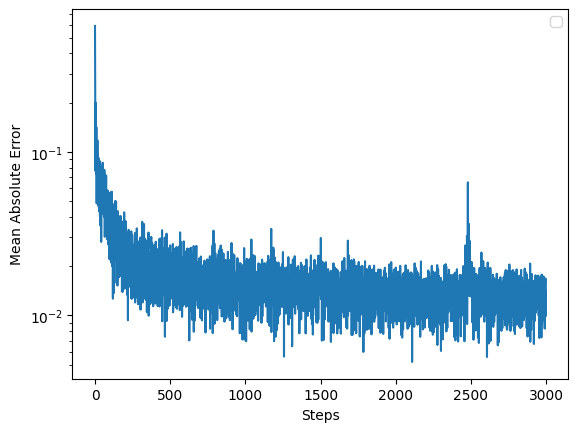

In [12]:
plt.plot(losses1)
print('MAE: %.3f (%.3f)' % (np.mean(losses1), np.std(losses1)))
plt.legend()
plt.xlabel("Steps")
plt.ylabel("Mean Absolute Error")
plt.yscale("log")
plt.show()

In [16]:
validation_data_1, validation_data_2, validation_data_3, y_valid = (
    X_test.iloc[:, :Ndims].values,
    X_test.iloc[:, Ndims : 2 * Ndims].values,
    X_test.iloc[:, 2 * Ndims :].values,
    np.array(y_test, dtype=np.float16),
)

valid_data = np.concatenate(
    (validation_data_3, validation_data_2, validation_data_1), axis=1
)
y_pred_train, std_train = model.test_model(
    validation_data_3, validation_data_2, validation_data_1, y_valid
)  

y_true = scalery.inverse_transform(y_valid)
y_pred = scalery.inverse_transform(y_pred_train)  

print(r2_score(y_true, y_pred, multioutput='variance_weighted'))


0.8521425974590485


In [29]:
df_test = pd.DataFrame(
    np.mean(abs(y_true[:, :] - y_pred[:, :])[:, :], axis=1), columns=['MAE']
)
df_test['model'] = ['Set Transformer' for _ in range(df_test.shape[0])]
df_test

,MAE,model
0,22.972917,Set Transformer
1,14.625547,Set Transformer
2,36.146667,Set Transformer
3,20.644792,Set Transformer
4,9.524521,Set Transformer
5,17.523979,Set Transformer
6,42.970833,Set Transformer
7,39.885521,Set Transformer
8,16.166667,Set Transformer


# Model comparison

In [18]:
regr_rf = RandomForestRegressor(n_estimators=500, max_depth=10, random_state=0)
regr_rf.fit(X_train.values, y_train)
rf_preds = regr_rf.predict(valid_data)
y_true = scalery.inverse_transform(y_valid)
y_pred = scalery.inverse_transform(rf_preds)

rf_df_test = pd.DataFrame(
    np.mean(abs(y_true - y_pred)[:, :], axis=1), columns=['MAE']
)
rf_df_test['model'] = ['Random Forest' for _ in range(rf_df_test.shape[0])]

In [19]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(
    n_estimators=800,
    max_depth=10,
    eta=0.1,
    subsample=0.7,
    colsample_bytree=0.8,
    random_state=0,
)
xgb_model.fit(X_train.values, y_train)
xgb_preds = xgb_model.predict(valid_data)
y_true = scalery.inverse_transform(y_valid)
y_pred = scalery.inverse_transform(xgb_preds)

xgb_df_test = pd.DataFrame(
    np.mean(abs(y_true - y_pred)[:, :], axis=1), columns=['MAE']
)
xgb_df_test['model'] = ['XGBoost' for _ in range(xgb_df_test.shape[0])]

In [25]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=20)
neigh.fit(X_train.values, y_train)
neigh_preds = neigh.predict(valid_data)
y_true = scalery.inverse_transform(y_valid)
y_pred = scalery.inverse_transform(neigh_preds)

neigh_df_test = pd.DataFrame(
    np.mean(abs(y_true - y_pred)[:, :], axis=1), columns=['MAE']
)
neigh_df_test['model'] = ['KNN' for _ in range(neigh_df_test.shape[0])]

In [20]:
from sklearn.linear_model import Lasso

# Train a logistic regression model
lasso_clf = Lasso(alpha=0.1)
lasso_clf.fit(X_train, y_train)
lasso_preds = lasso_clf.predict(valid_data)
# Predict and evaluate
y_pred = lasso_clf.predict(valid_data)

y_true = scalery.inverse_transform(y_valid)
y_pred = scalery.inverse_transform(lasso_preds)

lasso_df_test = pd.DataFrame(
    np.mean(abs(y_true - y_pred)[:, :], axis=1), columns=['MAE']
)
lasso_df_test['model'] = ['Lasso' for _ in range(lasso_df_test.shape[0])]

In [21]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Define the kernel and train a Gaussian process regressor
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gpr.fit(X_train, y_train)

# Predict and evaluate
gpr_pred, sigma = gpr.predict(valid_data, return_std=True)

y_true = scalery.inverse_transform(y_valid)
y_pred = scalery.inverse_transform(gpr_pred)

gpr_df_test = pd.DataFrame(
    np.mean(abs(y_true - y_pred)[:, :], axis=1), columns=['MAE']
)
gpr_df_test['model'] = ['GPR' for _ in range(gpr_df_test.shape[0])]

In [22]:
from tensorflow import keras

# Define the model architecture
model = keras.Sequential(
    [
        keras.layers.Dense(
            16, activation='relu', input_shape=(3168,)
        ), 
        keras.layers.Dense(
            3, activation='softmax'
        ),
    ]
)

# Compile the model
model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']
)

# Train the model
model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
)

ann_preds = model.predict(valid_data)
y_pred = model.predict(valid_data)

y_true = scalery.inverse_transform(y_valid)
y_pred = scalery.inverse_transform(ann_preds)

ann_df_test = pd.DataFrame(
    np.mean(abs(y_true - y_pred)[:, :], axis=1), columns=['MAE']
)
ann_df_test['model'] = ['ANN' for _ in range(ann_df_test.shape[0])]

Epoch 1/10
3/3 [==============================] - 1s 94ms/step - loss: 1.6034 - accuracy: 0.3284 - val_loss: 1.6276 - val_accuracy: 0.4444
Epoch 2/10
3/3 [==============================] - 0s 16ms/step - loss: 1.5509 - accuracy: 0.4179 - val_loss: 1.6556 - val_accuracy: 0.4444
Epoch 3/10
3/3 [==============================] - 0s 16ms/step - loss: 1.5496 - accuracy: 0.4328 - val_loss: 1.6527 - val_accuracy: 0.4444
Epoch 4/10
3/3 [==============================] - 0s 16ms/step - loss: 1.5431 - accuracy: 0.4478 - val_loss: 1.6479 - val_accuracy: 0.5556
Epoch 5/10
3/3 [==============================] - 0s 18ms/step - loss: 1.5411 - accuracy: 0.4925 - val_loss: 1.6567 - val_accuracy: 0.5556
Epoch 6/10
3/3 [==============================] - 0s 16ms/step - loss: 1.5515 - accuracy: 0.4776 - val_loss: 1.6684 - val_accuracy: 0.5556
Epoch 7/10
3/3 [==============================] - 0s 16ms/step - loss: 1.5635 - accuracy: 0.5224 - val_loss: 1.6714 - val_accuracy: 0.5556
Epoch 8/10
3/3 [===========

In [26]:
df_test_all = pd.concat(
    [
        df_test,
        ann_df_test,
        rf_df_test,
        xgb_df_test,
        lasso_df_test,
        neigh_df_test,
        gpr_df_test,
    ]
)


[Text(0, 0, 'Set Transformer'),
 Text(1, 0, 'ANN'),
 Text(2, 0, 'Random Forest'),
 Text(3, 0, 'XGBoost'),
 Text(4, 0, 'Lasso'),
 Text(5, 0, 'KNN'),
 Text(6, 0, 'GPR')]

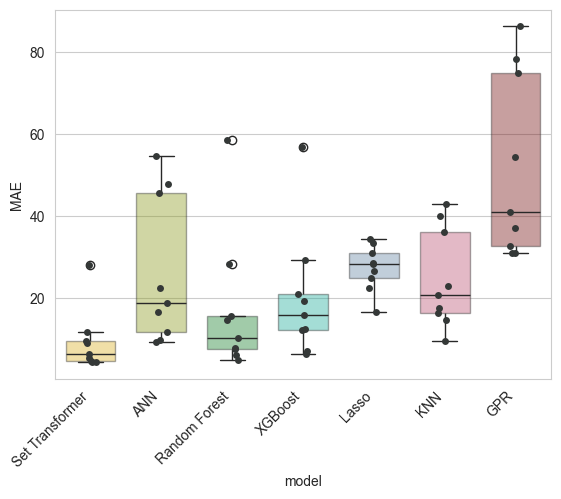

In [27]:
import seaborn as sns

sns.set_style('whitegrid')
boxprops = {'alpha': 0.4}  
colors = [
    '#fac205',
    '#9aae07',
    "#028f1e",
    '#06c2ac',
    '#5a86ad',
    '#cb416b',
    '#840000',
]  

palette = sns.color_palette(colors)

ax = sns.boxplot(
    x='model',
    y='MAE',
    data=df_test_all,
    palette=palette,
    boxprops=boxprops,
    width=0.7,
)
ax = sns.stripplot(x="model", y="MAE", data=df_test_all, color='#343837')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# plt.savefig('model_compare.svg', dpi =600)